<style>
@media print
{
h2 {page-break-before:always}
}
</style>

# Homework 06

### Brown University  
### DATA 1010  
### Fall 2019

In [1]:
using Optim, LinearAlgebra, Random
using Plots, StatsBase, Distributions

## Problem 1

Generate a random $n \times d$ feature matrix `X`, and then change its last column so as to induce an approximate (but not exact) linear dependence relationship involving all of the last three columns. Then define the response vector `y` to be an approximate linear combination of the first two columns. 

Let $d = 10$, and explore the behavior of the coefficient vector `X \ y` for various values of $n$ (including ones less than $d$, equal to $d$ and greater than $d$). Show how lasso and ridge regression mitigate the problems you observe.

Hint: make bar plots of the coefficients you obtain, following the example in [Data Gymnasia](https://mathigon.org/course/machine-learning/a-regression-example-linear-models). 

In [2]:
function groupedbar(β)
    bar([1; 1; zeros(8)], bar_width = 0.4,
        label = "actual coefficients", legend = :topleft)
    bar!((1:length(β)) .+ 0.4, β, bar_width = 0.4, 
         label = "coefficients from fit")
end

groupedbar (generic function with 1 method)

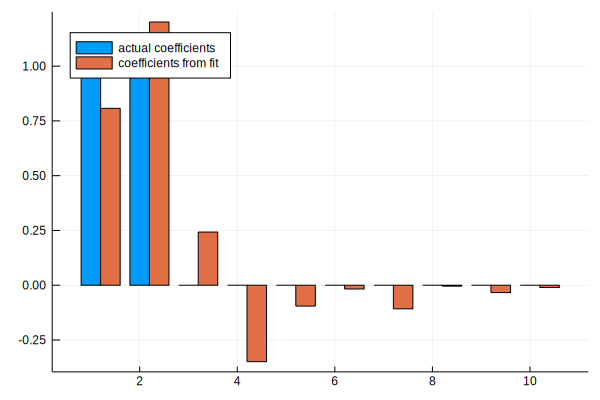

In [3]:
# n = 9
n = 9
d = 10
X = randn(n, d)
    
X[:,d] = X[:,d] .+ X[:,d-2] .+ X[:,d-1] .+ 0.01randn(n)
y = X[:,1] .+ X[:,2] .+ 0.1randn(n)
β = X \ y
groupedbar(β)

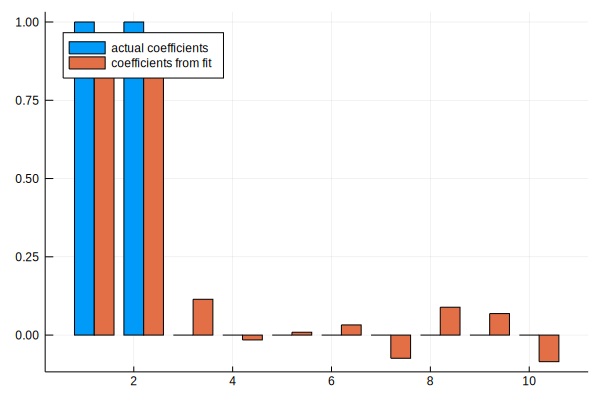

In [4]:
# ridge regression
λ = 1
o = optimize(β -> sum((y - X*β).^2) + λ*β[1:end]'*β[1:end], ones(d))
# o = optimize(β -> sum((y - X*β).^2) + λ*β[2:end]'*β[2:end], ones(10))
groupedbar(o.minimizer)

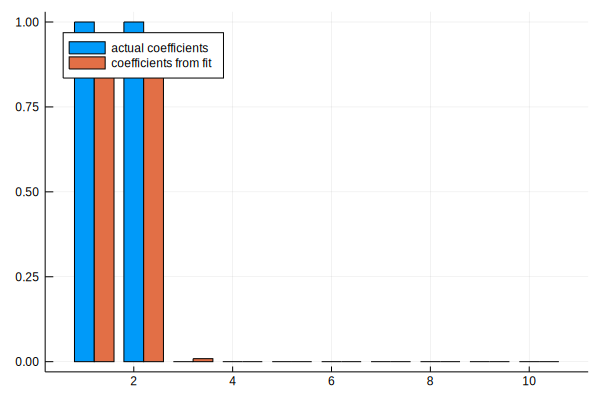

In [5]:
## lasso regression
λ = 1
o = optimize(β -> sum((y - X*β).^2) + λ*norm(β[1:end],1), ones(d))
groupedbar(o.minimizer)

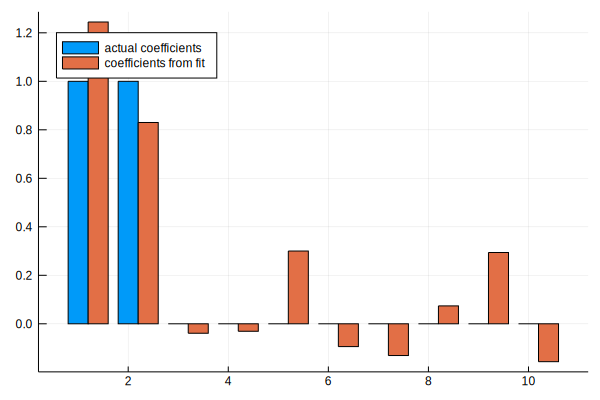

In [6]:
# n = 10
n = 10
d = 10
X = randn(n, d)
    
X[:,d] = X[:,d] .+ X[:,d-2] .+ X[:,d-1] .+ 0.01randn(n)
y = X[:,1] .+ X[:,2] .+ 0.1randn(n)
β = X \ y
groupedbar(β)

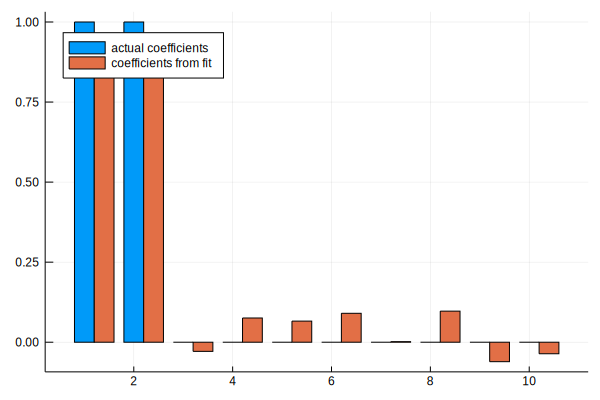

In [7]:
# ridge regression
λ = 1
o = optimize(β -> sum((y - X*β).^2) + λ*β[1:end]'*β[1:end], ones(d))
# o = optimize(β -> sum((y - X*β).^2) + λ*β[2:end]'*β[2:end], ones(10))
groupedbar(o.minimizer)

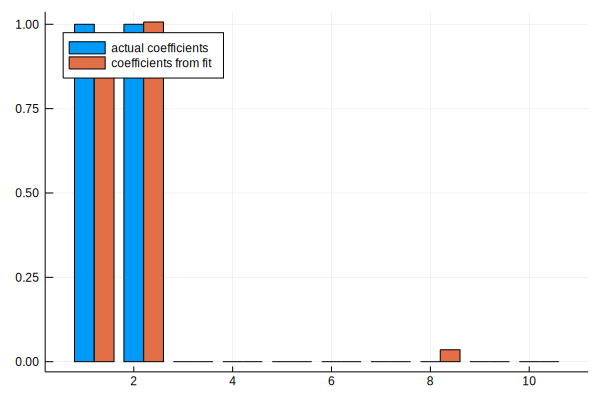

In [8]:
# lasso regression
λ = 1
o = optimize(β -> sum((y - X*β).^2) + λ*norm(β[1:end],1), ones(d))
groupedbar(o.minimizer)

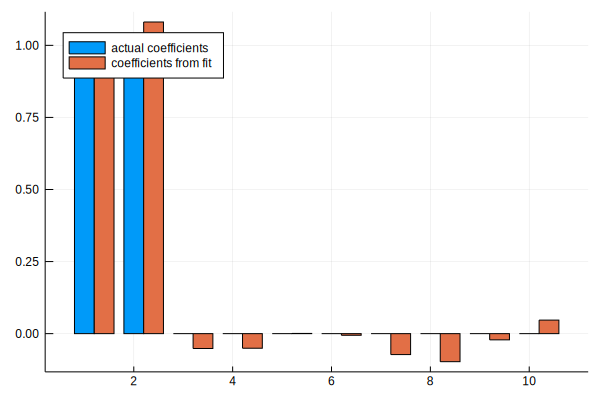

In [9]:
# n = 11
n = 11
d = 10
X = randn(n, d)
    
X[:,d] = X[:,d] .+ X[:,d-2] .+ X[:,d-1] .+ 0.01randn(n)
y = X[:,1] .+ X[:,2] .+ 0.1randn(n)
β = X \ y
groupedbar(β)

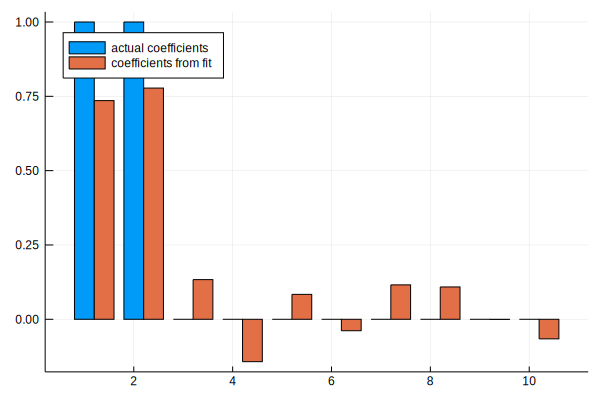

In [10]:
# ridge regression
λ = 1
o = optimize(β -> sum((y - X*β).^2) + λ*β[1:end]'*β[1:end], ones(d))
# o = optimize(β -> sum((y - X*β).^2) + λ*β[2:end]'*β[2:end], ones(10))
groupedbar(o.minimizer)

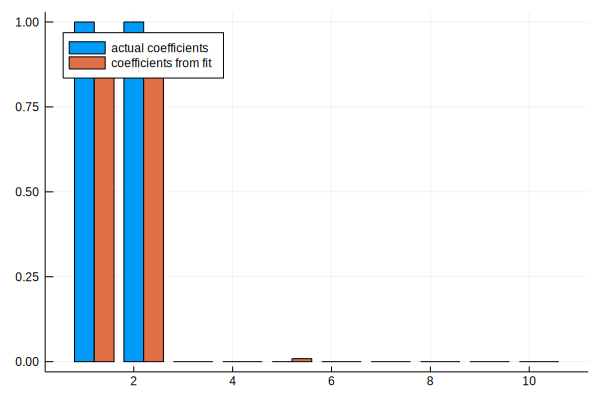

In [11]:
# lasso regression
λ = 1
o = optimize(β -> sum((y - X*β).^2) + λ*norm(β[1:end],1), ones(d))
groupedbar(o.minimizer)

The coefficient we get from fit is quiet different from the actual coefficient. Under all three conditions {n>d, n=d, and n<d}, Lasso regression mitigates the differences. However, ridge regression mitigates the errors when n<d, and it aggregrate the error when n>=d. 

## Problem 2

Suppose that for each $i = 1,2,\ldots, n$, the random vector $\mathbf{X}_i$ is chosen from a distribution on $\mathbb{R}^p$ and then $Y_i$ is chosen from the Bernoulli distribution with probability $r(\mathbf{X}_i)$, where $r: \mathbb{R}^p \to [0,1]$ is some function.

(a) Given $\mathbf{y} \in \{0,1\}^n$, find $\mathbb{P}( (Y_1, \ldots, Y_n) =
    \mathbf{y} | \mathbf{X}_1, \mathbf{X}_2, \ldots, \mathbf{X}_n)$.

(b) Suppose that multiple candidate $r$'s are proposed. Show that
    finding the one which maximizes your answer to (a) is the same as
    finding the one that minimizes
    $$\sum_{i=1}^{n} \left[y_i \log \frac{1}{r(X_i)} +(1-y_i)\log\frac{1}{1-r(X_i)}\right]$$

**Solution:**  
(a)
$$\mathbb{P}((Y_1, \dots, Y_n) = y|X_1, X_2, \dots, X_n)\\
= {r(X_1)}^{y_1}(1-r(X_1))^{1-y_1} \cdot \dots \cdot {r(X_n)}^{y_n}(1-r(X_n))^{1-y_n}\\
= \prod_{i=1}^{n}{r(X_i)}^{y_i}(1-r(X_i))^{1-y_i}$$  
(b)  
$$\log \prod_{i=1}^{n}{r(X_i)}^{y_i}(1-r(X_i))^{1-y_i}\\
= \sum_{i = 1}^{n} \left[\log {r(X_i)}^{y_i} + \log (1-r(X_i))^{1-y_i} \right]\\
= \sum_{i = 1}^{n} \left[{y_i}\log {r(X_i)} + (1-y_i)\log (1-r(X_i)) \right]\\
= - \sum_{i = 1}^{n} \left[{y_i}\log \frac{1}{r(X_i)} + (1-y_i)\log \frac{1}{1-r(X_i)} \right]
$$  
If we want to maximize the answers to (a), it is the same as minimizing its opposite number, which is the same as $\sum_{i=1}^{n} \left[y_i \log \frac{1}{r(X_i)} +(1-y_i)\log\frac{1}{1-r(X_i)}\right]$

## Problem 3

Train a QDA classifier for identifying a car as American or Japanese based on its weight and MPG rating. Use the `cars` dataset from the `VegaDatasets` package. Show the classification regions in different colors.   

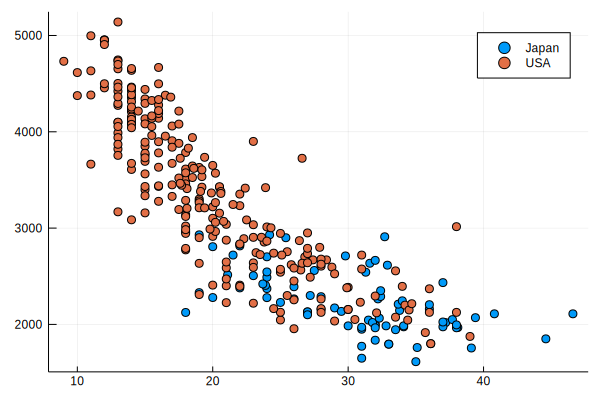

In [12]:
using VegaDatasets, Plots, DataFrames
D = DataFrame(dataset("cars"))
cars = [((x,y),c) for (x,y,c) in zip(D[:,:Miles_per_Gallon],
                                     D[:,:Weight_in_lbs],
                                     D[:,:Origin]) 
           if !any(ismissing.([x,y,c])) && c ≠ "Europe"]
x₁s = [x₁ for ((x₁,x₂),y) in cars]
x₂s = [x₂ for ((x₁,x₂),y) in cars]
ys = [y for ((x₁,x₂),y) in cars]
scatter(x₁s,x₂s,group=ys)

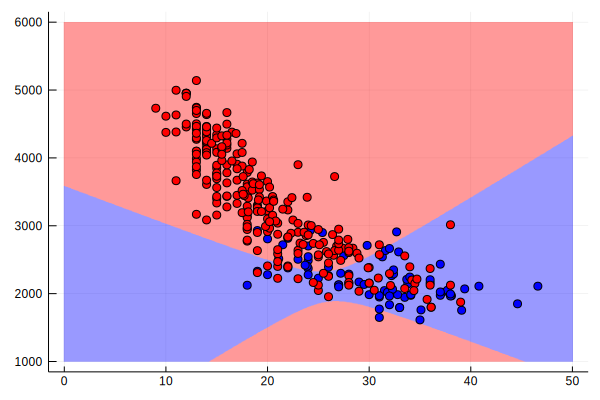

In [15]:
# p = ProbabilityWeights([254/(254+79), 79/(254+79)])

xgrid = 0:0.1:50
ygrid = 1000:5:6000
country = ["Japan", "USA"]
predict(x,p,Ns) = argmax([p[i]*pdf(Ns[i],x) for i=1:2])

function classificationplot(cars,p,Ns)
    rgb = [:blue, :red]
    P = heatmap(xgrid,ygrid,(x,y) -> predict([x,y],p,Ns),
          fillcolor = cgrad(rgb), opacity = 0.4, legend = false)
    scatter!(P,[(car[1][1],car[1][2]) for car in cars if car[2]=="Japan"], color= :blue, label = "Japan")
    scatter!(P,[(car[1][1],car[1][2]) for car in cars if car[2]=="USA"], color= :red, label = "USA")
    P
end

function mvn_est(cars, cc)
    cars_sub = [[car[1][1], car[1][2]] for car in cars if car[2] == cc]
    μ = mean(cars_sub)
    Σ = mean([(X - μ) * (X - μ)' for X in cars_sub])
    MvNormal(μ, Σ)
end

countcc = countmap([car[2] for car in cars])
p = [countcc[cc]/length(cars) for cc in country]
Ns = [mvn_est(cars, cc) for cc in country]
classificationplot(cars, p, Ns)

## Problem 4

Train a classifier based on kernel density estimation for identifying a car as American or Japanese based on its weight and MPG rating. Use the `cars` dataset from the `VegaDatasets` package. Show the classification regions in different colors.   

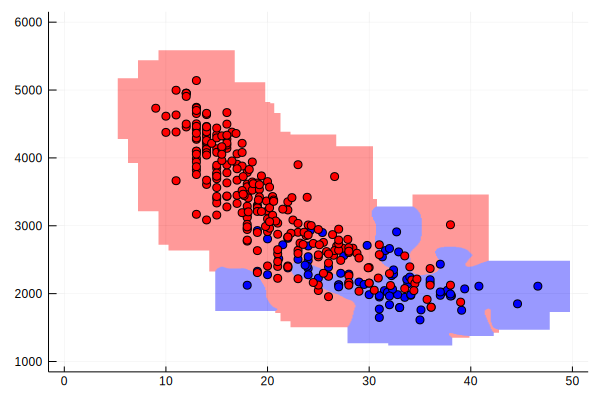

In [17]:
xs = 0:0.1:50
ys = 1000:5:6000

Japan_samples = [car[1] for car in cars if car[2] == "Japan"]
USA_samples = [car[1] for car in cars if car[2] == "USA"]


DD(u) = abs(u) < 1 ? 70/81*(1-abs(u)^3)^3 : 0 # tri-cube function
DD(λ,u) = 1/λ*DD(u/λ) # scaled tri-cube
K(λ,x,y) = DD(λ/(6000/50),x) * DD(λ,y) # kernel
kde(λ,x,y,samples) = sum(K(λ,x-Xi,y-Yi) for (Xi,Yi) in samples)/length(samples)


function kdeCV(λ,i,samples) # "Evaluate the summation Σᵢ f⁽⁻ⁱ⁾(Xᵢ,Yᵢ) in J(λ)'s second term"
    x,y = samples[i]
    newsamples = copy(samples)
    deleteat!(newsamples,i)
    kde(λ,x,y,newsamples)
end


# `optimize` takes functions which accept vector arguments, so we treat λ as a one-entry vector
# first line approximates ∫f̂², the second line approximates -(2/n)∫f̂f
J_Japan(λ) = sum([kde(λ,x,y,Japan_samples)^2 for x=xs,y=ys])*step(xs)*step(ys) -
        2/length(Japan_samples)*sum(kdeCV(λ,i,Japan_samples) for i=1:length(Japan_samples))
λ_Japan_best_cv = optimize(λ->J_Japan(first(λ)),[1.0],BFGS())

J_USA(λ) = sum([kde(λ,x,y,USA_samples)^2 for x=xs,y=ys])*step(xs)*step(ys) -
        2/length(USA_samples)*sum(kdeCV(λ,i,USA_samples) for i=1:length(USA_samples))
λ_USA_best_cv = optimize(λ->J_USA(first(λ)),[1.0],BFGS())

λ_J = first(λ_Japan_best_cv.minimizer)
λ_USA = first(λ_USA_best_cv.minimizer)

λ = [λ_J,λ_USA]
samples = [Japan_samples, USA_samples]

function kde_predict(p, λ, x, y, samples)
    if kde(λ[1], x, y, samples[1]) == 0 && kde(λ[2], x, y, samples[2]) == 0
        return 3 # third class, we set it in white color
    end
    return argmax([p[i] * kde(λ[i], x, y, samples[i]) for i = 1:2])
end

function classificationplot(cars, p, λ, samples)
    rgb = [:blue,:red,:white]
    P = heatmap(xgrid,ygrid,(x,y) -> kde_predict(p, λ, x, y, samples), fillcolor = cgrad(rgb), opacity=0.4, legend = false)
    scatter!(P,[(car[1][1],car[1][2]) for car in cars if car[2] == "Japan"], color = :blue, label = "Japan")
    scatter!(P,[(car[1][1],car[1][2]) for car in cars if car[2] == "USA"], color = :red, label = "USA")
    P
end

classificationplot(cars, p, λ, samples)

## Problem 5

(a) Serialize each of the first 1000 images in the MNIST data set and compute the pairwise Euclidean distances between the resulting vectors. Make a histogram of the resulting list of a million numbers. 

(b) Repeat the exercise from (a) with 1000 white-noise images (`rand(28,28)`). 

In [27]:
import Pkg
Pkg.add("JLD")
using Pkg, JLD
using LinearAlgebra

 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]


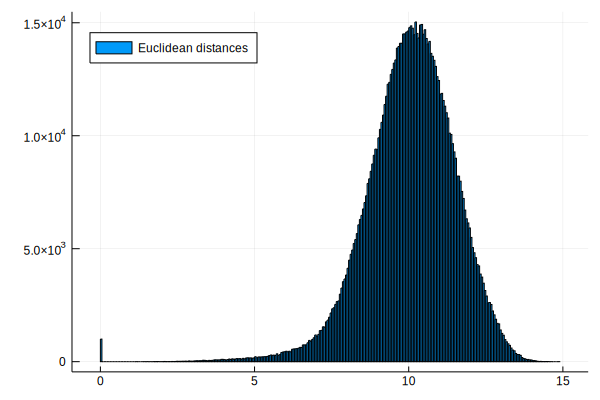

In [29]:
# (a)
images = load("mnist.jld")["images"]
euclideanD = []
for i in 1:1000
    for j in 1:1000
        push!(euclideanD, norm(vec(images[:,:,i])-vec(images[:,:,j])))
    end
end
histogram(euclideanD, label = "Euclidean distances", legend = :topleft)

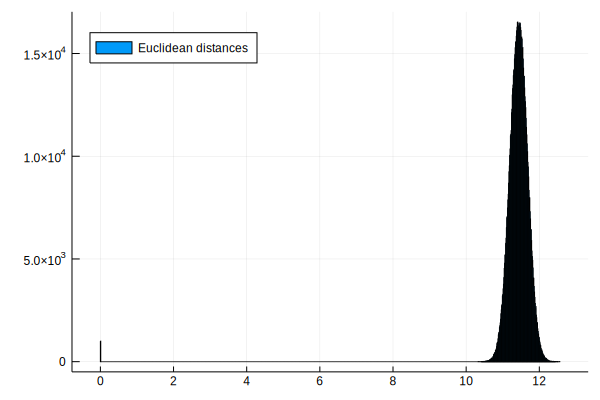

In [30]:
# (b) 
euclidean2 = []
images2 = images
for last in 1:1000
    images[:,:,last] = rand(28,28)
end

for i in 1:1000
    for j in 1:1000
        push!(euclidean2, norm(vec(images2[:,:,i])-vec(images2[:,:,j])))
    end
end
histogram(euclidean2, label = "Euclidean distances", legend = :topleft)